In [1]:
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from brokenaxes import brokenaxes

In [2]:
runname = 'p5483'

[Time, ns, ppa]  = list(map(lambda aa: np.load('../../mechData/p5483_mechdat_reduced.npz',allow_pickle=True)['arr_0'][:,aa], [0, 4, 8]))

In [7]:
def goodplot(x, y1, y2, begin,end,xlim):

    fig, ax1 = plt.subplots(1,1,figsize=(32,4))
    ax2 = ax1.twinx()
    
#     bax = brokenaxes(xlims=((10000, 1336608), (1339692, 3023431)), hspace=.05)
    
    for spine in ['left','right','top','bottom']:
#     ax1.spines[spine].set_color('k')
        ax1.spines[spine].set_linewidth(1.5)

    ax1.plot(x[begin:end]-x[begin], y1[begin:end], color = [0.7,0,0], linestyle='-',linewidth=0.25)
    ax2.plot(x[begin:end]-x[begin], y2[begin:end], color = [0,0,0.8], linestyle='-',linewidth=0.25)

    # AXES: MINOR TICKS, COLORS 
#     ax1.set_xlim(xlim)
    ax1.set_ylim([7, 22.5])
    ax2.set_ylim([0.9, 3.9])
    ax1.minorticks_on(); ax2.minorticks_on();
    ax1.get_xaxis().set_tick_params(direction='in', top=True, bottom=True,which='major',width=2, length=8)
    ax1.get_xaxis().set_tick_params(direction='in', top=True, bottom=True,which='minor',width=1.5, length=5)
    ax1.get_yaxis().set_tick_params(direction='in', top=False, bottom=True,which='major', colors=[0.7,0,0],width=2, length=8)
    ax1.get_yaxis().set_tick_params(direction='in', top=False, bottom=True,which='minor', colors=[0.7,0,0],width=1.5, length=5)
    ax2.get_yaxis().set_tick_params(direction='in', top=True, bottom=False,which='major',colors=[0,0,0.8],width=2, length=8)
    ax2.get_yaxis().set_tick_params(direction='in', top=True, bottom=False,which='minor',colors=[0,0,0.8],width=1.5, length=5)
    for ax in (ax1,ax2):
        ax.spines['left'].set_color([0.7,0,0])
        ax.spines['right'].set_color([0,0,0.8])
        
    plt.rcParams.update({'font.size': 20})


    # AXES LABELS & COLORS   
#     ax1.set_xlabel('1 Hz $\sigma_{'+labels[aa]+'}$ Osc Amp (MPa)',color='k')
    ax1.ticklabel_format(axis='both',style='sci',scilimits=(-2,2))
    ax1.set_ylabel('Normal Stress (MPa)',color=[0.7,0,0])
    ax2.set_ylabel('Pore Pressure (MPa)',color=[0,0,0.8])
    ax1.set_xlabel('Time (s)',color='k')
    
#     fig.savefig('/home/clay/Documents/research/fracture_doe/doe-bes17/manuscript/plots/NSPPexp.svg',transparent=True)

    plt.show()

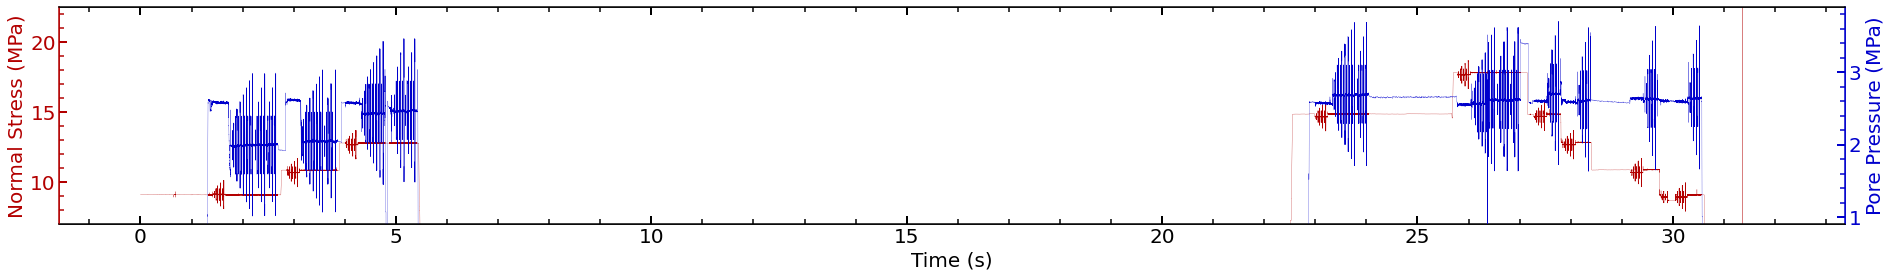

In [8]:
# %matplotlib inline
goodplot(Time/3600, ns, ppa, 10000,-1,[1.3e4, 2.8e4])

In [5]:
np.size(Time)

3023431

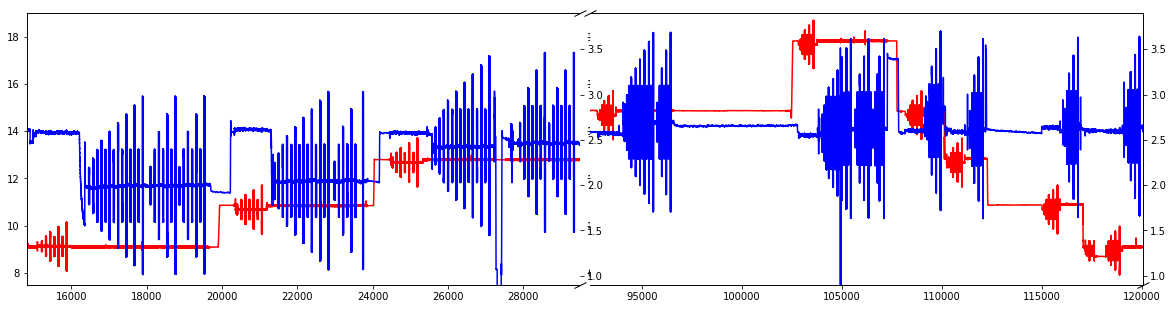

In [94]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""
import matplotlib.pylab as plt
import numpy as np

f,(ax,ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
f.subplots_adjust(wspace=0.018)  # adjust space between axes
ax3 = ax.twinx()
ax4 = ax2.twinx()

# plot the same data on both axes
ax.plot(Time, ns, color='r')
ax2.plot(Time, ns, color='r')
ax3.plot(Time, ppa, color='b')
ax4.plot(Time, ppa, color='b')

ax.set_xlim(Time[20000], Time[1336608])
ax2.set_xlim(Time[1339692], Time[3019067])
ax3.set_xlim(Time[20000], Time[1336608])
ax4.set_xlim(Time[1339692], Time[3019067])

ax.set_ylim([7.5, 19])
ax3.set_ylim([0.9, 3.9])
ax2.set_ylim([7.5, 19])
ax4.set_ylim([0.9, 3.9])

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='on')
# ax2.yaxis.tick_right()

ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
# ax3.yaxis.tick_left()
ax3.tick_params(labelright='on')
ax4.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

# d = .013 # how big to make the diagonal lines in axes coordinates
# # arguments to pass plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d,1+d), (-d,+d), **kwargs)
# ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((-d,+d), (-d,+d), **kwargs)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([1, 1], [1, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 0], transform=ax2.transAxes, **kwargs)



# kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
# ax3.plot((1-d,1+d), (-d,+d), **kwargs)
# ax3.plot((1-d,1+d),(1-d,1+d), **kwargs)

# kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
# ax4.plot((-d,+d), (1-d,1+d), **kwargs)
# ax4.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

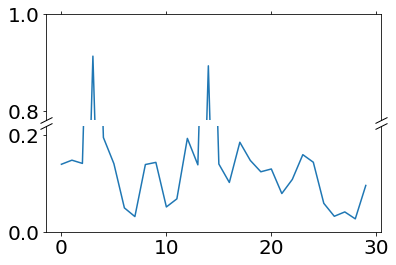

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

In [1]:
# from bokeh.plotting import figure, show, save
# from bokeh.io import output_notebook, output_file, reset_output
# from bokeh.layouts import gridplot, row, column
# output_notebook()

# fig31 = figure(tools='pan,box_zoom,undo,hover,crosshair') 
# fig31.line(Time, ns, line_width=1.5, line_color="crimson")
# fig31.yaxis.axis_label = 'effNS (MPa)'

# fig32 = figure(x_range=fig31.x_range, tools='pan,box_zoom,undo,save,hover,crosshair')
# fig32.line(Time, ppa, line_width=1.5, line_color="mediumblue")
# fig32.yaxis.axis_label = 'Velocity (km/s)'


# fig3 = gridplot([fig31, fig32], ncols=1, plot_width=800, plot_height=250)
# show(fig3)